In [40]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
#show metric for each fold in k fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


In [2]:
df = pd.read_csv('Sacramento_real_estate_transactions.csv')

In [3]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB
None


In [5]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [6]:
missing_values = df.isnull().sum()
print(missing_values)


street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64


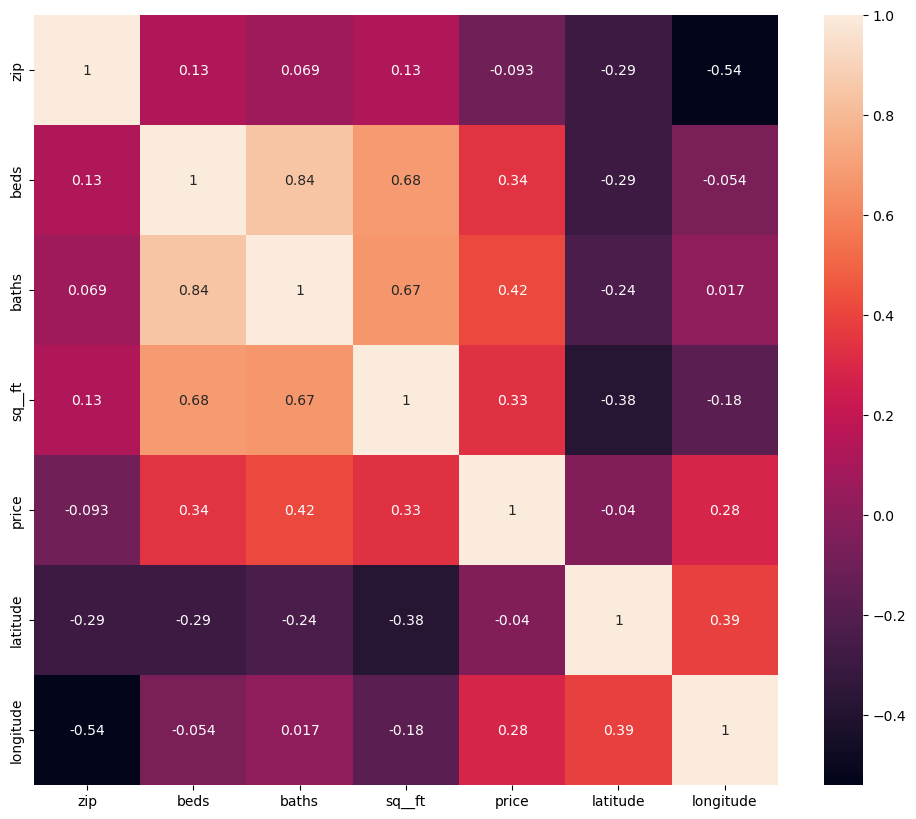

In [41]:
def show_heatmap_person(df, method='pearson'):
  plt.figure(figsize=(12,10))
  cor = df.corr(method=method)
  sns.heatmap(cor, annot=True)
  return cor
  plt.show()

cor = show_heatmap_person(df)

In [7]:
remove_columns = ['street', 'city', 'zip', 'state', 'sale_date', 'latitude', 'longitude']

In [8]:
df_enc = df[df.columns.difference(remove_columns)]

In [9]:
df_enc

,baths,beds,price,sq__ft,type
0,1,2,59222,836,Residential
1,1,3,68212,1167,Residential
2,1,2,68880,796,Residential
3,1,2,69307,852,Residential
4,1,2,81900,797,Residential
...,...,...,...,...,...
980,3,4,232425,2280,Residential
981,2,3,234000,1477,Residential
982,2,3,235000,1216,Residential
983,2,4,235301,1685,Residential


In [10]:
df_encoded = pd.get_dummies(df_enc, drop_first=True)


df_encoded



,baths,beds,price,sq__ft,type_Multi-Family,type_Residential,type_Unkown
0,1,2,59222,836,0,1,0
1,1,3,68212,1167,0,1,0
2,1,2,68880,796,0,1,0
3,1,2,69307,852,0,1,0
4,1,2,81900,797,0,1,0
...,...,...,...,...,...,...,...
980,3,4,232425,2280,0,1,0
981,2,3,234000,1477,0,1,0
982,2,3,235000,1216,0,1,0
983,2,4,235301,1685,0,1,0


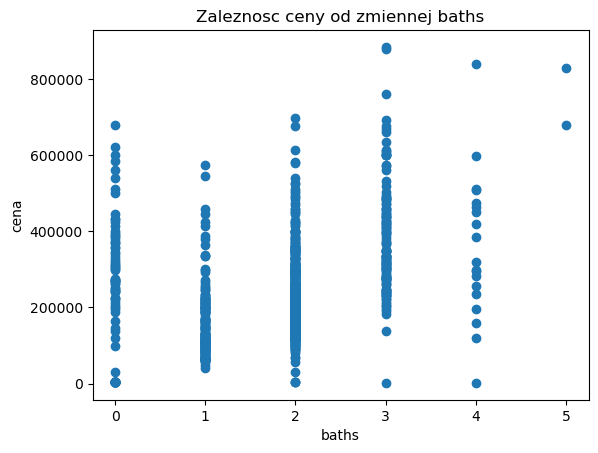

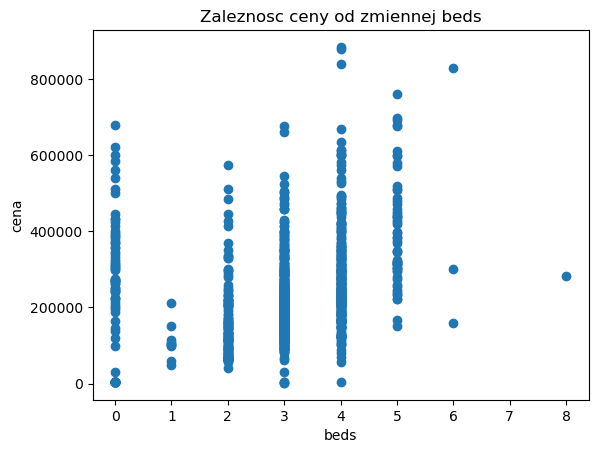

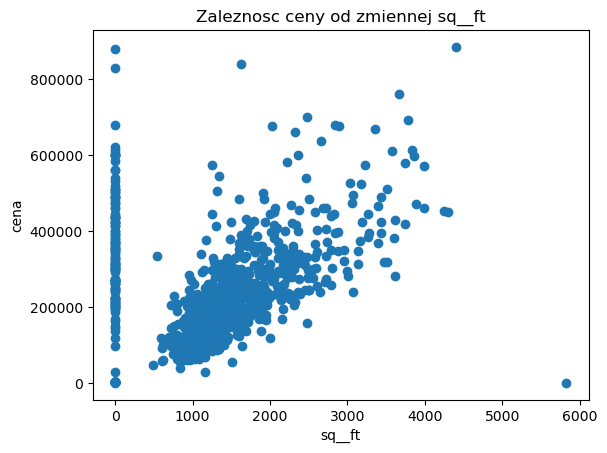

In [11]:
selected_columns = ['baths', 'beds', 'sq__ft']
for column in selected_columns:
  plt.title(f"Zaleznosc ceny od zmiennej {column}")
  plt.xlabel(column)
  plt.ylabel("cena")
  plt.scatter(df_encoded[column], df_encoded['price'])
  plt.show()

In [12]:
df_encoded[df_encoded['beds']==0]

,baths,beds,price,sq__ft,type_Multi-Family,type_Residential,type_Unkown
73,0,0,206000,0,0,1,0
89,0,0,244500,0,0,1,0
100,0,0,263500,0,0,1,0
121,0,0,320000,0,0,1,0
126,0,0,339500,0,0,1,0
...,...,...,...,...,...,...,...
901,0,0,138000,0,0,0,0
917,0,0,165000,0,0,1,0
934,0,0,188000,0,0,0,0
947,0,0,200100,0,0,1,0


In [13]:
moda_beds = df_encoded['beds'].mode()[0]
moda_baths = df_encoded['baths'].mode()[0]

In [14]:
moda_beds

3

In [15]:
moda_baths

2

In [16]:
moda_beds

3

In [17]:
df_encoded.loc[df['beds'] == 0, 'beds'] = moda_beds
df_encoded.loc[df['baths'] == 0, 'baths'] = moda_baths

In [18]:
df_encoded['sq__ft'].mean()

1314.9167512690356

In [19]:
df_encoded['sq__ft'].median()

1304.0

In [20]:
df['sq__ft'].describe()

count     985.000000
mean     1314.916751
std       853.048243
min         0.000000
25%       952.000000
50%      1304.000000
75%      1718.000000
max      5822.000000
Name: sq__ft, dtype: float64

<AxesSubplot:>

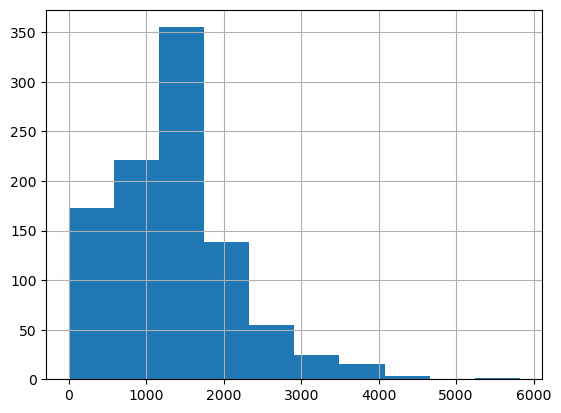

In [21]:
df['sq__ft'].hist()

In [22]:
df_encoded.loc[df['sq__ft'] == 0, 'sq__ft'] = df_encoded['sq__ft'].mean()

In [23]:
def replace_outliers(df, column_name, iqr_threshold, replacement_value):

    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1


    lower_bound = q1 - iqr_threshold * iqr
    upper_bound = q3 + iqr_threshold * iqr

    mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

    # Replace outliers with the specified replacement value
    df.loc[mask, column_name] = replacement_value

    return df

In [24]:
df_encoded = replace_outliers(df_encoded, 'sq__ft', 2, replacement_value=df_encoded['sq__ft'].mean())
df_encoded.loc[df_encoded['sq__ft'] == 0, 'sq__ft'] = df_encoded['sq__ft'].mean()

In [25]:
df_encoded

,baths,beds,price,sq__ft,type_Multi-Family,type_Residential,type_Unkown
0,1,2,59222,836.0,0,1,0
1,1,3,68212,1167.0,0,1,0
2,1,2,68880,796.0,0,1,0
3,1,2,69307,852.0,0,1,0
4,1,2,81900,797.0,0,1,0
...,...,...,...,...,...,...,...
980,3,4,232425,2280.0,0,1,0
981,2,3,234000,1477.0,0,1,0
982,2,3,235000,1216.0,0,1,0
983,2,4,235301,1685.0,0,1,0


In [26]:
X = df_encoded[df_encoded.columns.difference(['price'])]
y = df['price']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
y_pred = model.predict(X_test)

model.predict(X_test)

array([100488.2418889 , 338282.78533714, 260136.94308303, 340612.76138001,
       236855.26394626, 225504.33487215, 210233.7982307 , 272089.17143373,
       225504.33487215, 225504.33487215, 135897.88651289, 225504.33487215,
       216142.59767976, 302644.82215412, 137289.43515095, 240013.00893263,
        94547.39962641, 105320.31485278, 225504.33487215, 330132.88222629,
       268342.69433126, 228024.28220473, 280046.79282757, 222832.73536274,
       217962.31512953, 242046.81078825, 351370.50277424, 188011.82285484,
       255818.75658872, 253500.32650151, 223046.81976859, 346607.12474396,
       235677.79971406, 236587.65843894, 225504.33487215, 140821.82784757,
       173882.25206839, 240815.82545459, 184747.03566555, 225504.33487215,
       356187.40190599,  95365.38998051, 225504.33487215, 371012.74701147,
       346607.12474396, 257531.43183556, 230593.29507499, 384018.37466718,
       146709.14900859, 345403.41886774, 233108.78684379, 221922.87663785,
       237711.60156968, 2

In [30]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 16168703181.818241


In [31]:
model.score(X_test, y_test)

0.21315931452751424

In [32]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print('Best parameters:', best_params)


Best parameters: {'fit_intercept': True}


In [34]:
model_optimized = LinearRegression(**best_params)
model_optimized.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
model_optimized.score(X_train_scaled, y_train)

0.2814845526746781

In [36]:
y_pred_optimized = model_optimized.predict(X_test_scaled)

In [37]:
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print('Optimized Model Mean Squared Error:', mse_optimized)


Optimized Model Mean Squared Error: 16168703181.818245


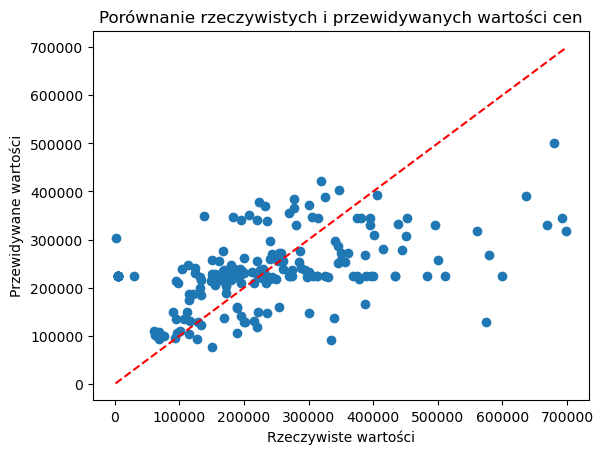

In [38]:
plt.scatter(y_test, y_pred_optimized)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Porównanie rzeczywistych i przewidywanych wartości cen')
plt.show()

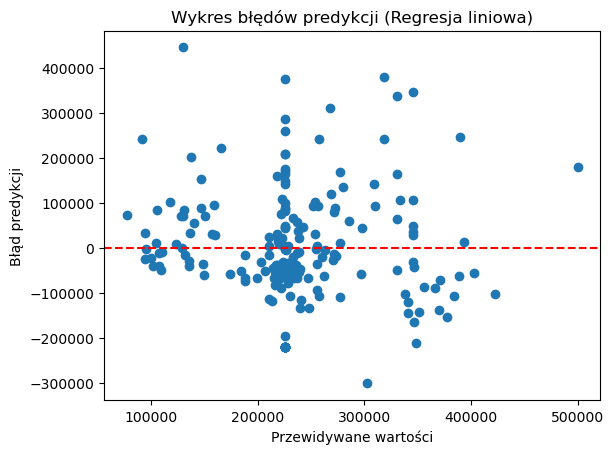

In [39]:
errors_linear = y_test - y_pred
plt.scatter(y_pred, errors_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Błąd predykcji')
plt.title('Wykres błędów predykcji (Regresja liniowa)')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestRegressor


model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
y_pred_rf = model_rf.predict(X_test)

In [44]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Mean Squared Error:', mse_rf)

Random Forest Mean Squared Error: 14712202898.686094


In [45]:
from sklearn.model_selection import RandomizedSearchCV


param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [46]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_iter=10)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [47]:
best_params = random_search.best_params_
print('Best parameters:', best_params)

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}


In [48]:
model_optimized_rf = RandomForestRegressor(**best_params, random_state=42)
model_optimized_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=42)

In [49]:
y_pred_optimized_rf = model_optimized_rf.predict(X_test)

In [54]:
mse_optimized_rf = mean_squared_error(y_test, y_pred_optimized_rf)
print('Optimized Random Forest Mean Squared Error:', mse_optimized_rf)


Optimized Random Forest Mean Squared Error: 14048153421.410057


0.3163546548275553

In [ ]:
model_optimized_rf.score(X_test, y_test)

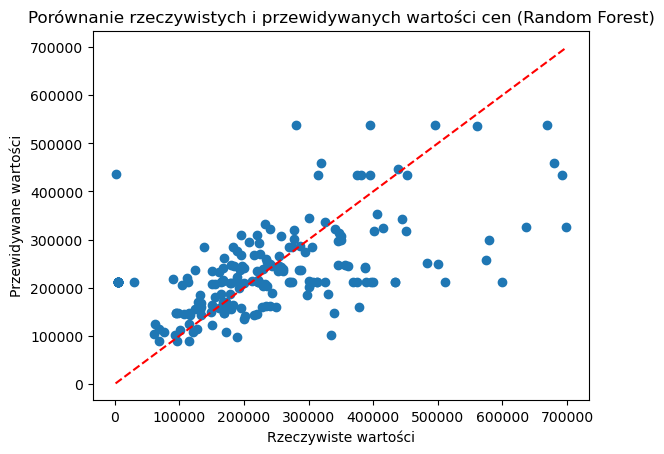

In [51]:
plt.scatter(y_test, y_pred_optimized_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Porównanie rzeczywistych i przewidywanych wartości cen (Random Forest)')
plt.show()

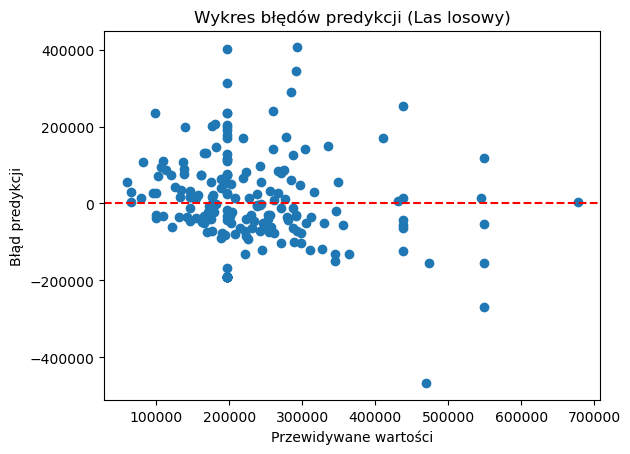

In [53]:
errors_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, errors_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Błąd predykcji')
plt.title('Wykres błędów predykcji (Las losowy)')
plt.show()